In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing

In [2]:
movie_df = pd.read_csv("IMDB Dataset.csv", engine="python", error_bad_lines=False)
label_encoder = preprocessing.LabelEncoder()
movie_df['sentiment']= label_encoder.fit_transform(movie_df["sentiment"]) 
movie_df.head()

<ipython-input-2-436ab231f6ac>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  movie_df = pd.read_csv("IMDB Dataset.csv", engine="python", error_bad_lines=False)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [3]:
review = movie_df["review"].values
sentiment = movie_df["sentiment"].values
review_train, review_test, sentiment_train, sentiment_test = train_test_split(review, 
                                                                              sentiment, 
                                                                              test_size=0.2
                                                                              )

In [4]:
tokenizer = Tokenizer(num_words=1500,oov_token="_")
tokenizer.fit_on_texts(review_train)
tokenizer.fit_on_texts(review_test)

In [5]:
sequence_train = tokenizer.texts_to_sequences(review_train)
sequence_test = tokenizer.texts_to_sequences(review_test)

In [6]:
sequence_padded_train = pad_sequences(sequence_train)
sequence_padded_test = pad_sequences(sequence_test)
print(sequence_padded_train)
print(sequence_padded_test)

[[   0    0    0 ...   93    1    1]
 [   0    0    0 ...    5    2   56]
 [   0    0    0 ...   37    1    1]
 ...
 [   0    0    0 ...   16   93  778]
 [   0    0    0 ... 1328   13    7]
 [   0    0    0 ...    1   24  647]]
[[   0    0    0 ...    1   39  592]
 [   0    0    0 ...   26   76  138]
 [   0    0    0 ...    1    3    1]
 ...
 [   0    0    0 ...   16    1    1]
 [   0    0    0 ...    9    2    1]
 [   0    0    0 ...  116   34 1259]]


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1500, output_dim=20),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.125),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          30000     
                                                                 
 lstm (LSTM)                 (None, 128)               76288     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.875 and logs.get('val_accuracy')>0.875):
      print("\nAkurasi telah mencapai >87.5%!")
      self.model.stop_training = True
callbacks = myCallback()

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 50
result = model.fit(sequence_padded_train, 
                    sentiment_train, 
                    steps_per_epoch=50,
                    validation_steps=10,
                    epochs=num_epochs, 
                    validation_data=(sequence_padded_test, sentiment_test), 
                    verbose=2,
                    callbacks=[callbacks]
                    )

Epoch 1/50
50/50 - 35s - loss: 0.6706 - accuracy: 0.6180 - val_loss: 0.6218 - val_accuracy: 0.7158 - 35s/epoch - 703ms/step
Epoch 2/50
50/50 - 30s - loss: 0.6042 - accuracy: 0.6867 - val_loss: 0.5755 - val_accuracy: 0.7212 - 30s/epoch - 602ms/step
Epoch 3/50
50/50 - 30s - loss: 0.4201 - accuracy: 0.8164 - val_loss: 0.3698 - val_accuracy: 0.8386 - 30s/epoch - 603ms/step
Epoch 4/50
50/50 - 31s - loss: 0.3396 - accuracy: 0.8634 - val_loss: 0.3216 - val_accuracy: 0.8644 - 31s/epoch - 621ms/step
Epoch 5/50
50/50 - 31s - loss: 0.3007 - accuracy: 0.8841 - val_loss: 0.3130 - val_accuracy: 0.8671 - 31s/epoch - 621ms/step
Epoch 6/50
50/50 - 31s - loss: 0.2875 - accuracy: 0.8877 - val_loss: 0.3042 - val_accuracy: 0.8702 - 31s/epoch - 619ms/step
Epoch 7/50
50/50 - 31s - loss: 0.2822 - accuracy: 0.8904 - val_loss: 0.3148 - val_accuracy: 0.8712 - 31s/epoch - 621ms/step
Epoch 8/50

Akurasi telah mencapai >87.5%!
50/50 - 31s - loss: 0.2908 - accuracy: 0.8863 - val_loss: 0.2949 - val_accuracy: 0.8782 -

Model mencapai akurasi latih dan validasi diatas 87.5% pada epoch ke-8

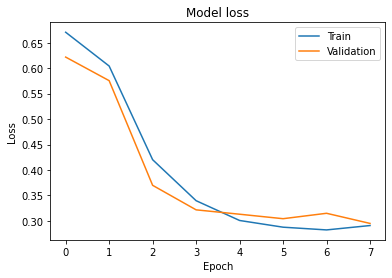

In [10]:
import matplotlib.pyplot as plt

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

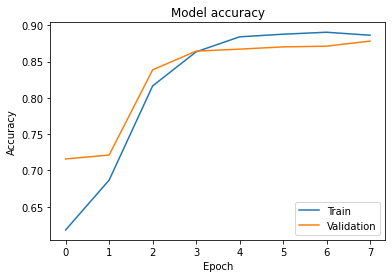

In [11]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='lower right')
plt.show()